# 2) Accessing the values

In [1]:
import clr
clr.AddReference(r"G:/HyTools/Swax/Qha_n7.exe")
from QueenslandHydrology.PythonApi import *

### Load a timeseries (keep the whole timeseries, not just calculating a stat)

In [2]:
my_timeseries = QHA.TS.Read('.\Resources\TimeseriesData\granite_belt_modelled_gauges.res.csv', r"Gauge>0016 Stanthorpe DS>Downstream Flow")

print(my_timeseries)

Index: 0
Name: Gauge>0016 Stanthorpe DS>Downstream Flow
Timestep: day
Length: 47481
Start: 1/07/1889 12:00:00 AM
End: 30/06/2019 12:00:00 AM
Units: ML.day^-1



In [3]:
a = my_timeseries.GetValues()
print(type(my_timeseries))
print(type(a))

<class 'QueenslandHydrology.Timeseries.SimpleTimeseries'>
<class 'list'>


In [4]:
print(a)

[0.0, 0.0, 0.0, 0.0, 0.0, 17.8860461812507, 19.4404270322248, 17.8654742596469, 19.7332956565566, 19.4986999849692, 15.8269489366097, 13.7743504687699, 12.2548639515039, 19.0193789182347, 18.2676773570407, 279.907800196217, 409.123281971252, 2004.82360756166, 1222.94581740411, 613.380166237509, 522.163318090822, 440.663305862657, 335.2575382616, 272.397826762367, 285.572551520329, 269.370033997759, 215.190824428583, 185.965808563063, 164.814722079077, 149.765286606882, 137.775167080524, 128.23279256652, 119.107778972071, 121.043105759595, 111.954483887052, 123.596218761419, 219.994803927802, 205.469497777963, 140.103691149092, 118.672988623612, 105.414212641585, 95.612810335528, 88.3420494578062, 82.5458126043841, 77.3984771005604, 72.8681825070793, 68.5842923280122, 65.9022168049261, 61.896741116347, 58.2957396200351, 54.2294671985252, 51.1308788850582, 48.3613599510336, 45.7547022574716, 44.1650648915505, 40.7833307712768, 38.5223317526198, 36.3833013883513, 34.122408433443, 32.38946

In [5]:
### What about an individual value?
my_timeseries.GetValue(1889,7,6)

17.8860461812507

### Building a Pandas DataFrame and plotting with Matplotlib

In [6]:
import pandas as pd
import datetime as datetime

#Create a DataFrame and add dates
df = pd.DataFrame()
df['Date'] = pd.date_range(start='1889-07-01', end='2019-06-30')
df = df.set_index('Date')

dictionary = {}
dictionary['Farnbro 416310A (ML/d)'] = r"Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow"
dictionary['Ballandean 416318A (ML/d)'] = r"Gauge>1004 Severn River at Ballandean (416318A)>Downstream Flow"
dictionary['Wallaces Dump 416320A (ML/d)'] = r"Gauge>1005 Accommodation Creek at Wallaces Dump (416320A)>Downstream Flow"

for key in dictionary.keys():
    ts = QHA.TS.Read('.\Resources\TimeseriesData\granite_belt_modelled_gauges.res.csv', dictionary[key])
    df[key] = ts.GetValues()

df

Farnbro 416310A (ML/d)  Ballandean 416318A (ML/d)  \
Date                                                            
1889-07-01               10.031991               0.000000e+00   
1889-07-02                5.200000               0.000000e+00   
1889-07-03                1.342525               0.000000e+00   
1889-07-04                0.000000               0.000000e+00   
1889-07-05                0.000000               0.000000e+00   
1889-07-06                0.000000               0.000000e+00   
1889-07-07                0.000000               0.000000e+00   
1889-07-08                0.000000               0.000000e+00   
1889-07-09                0.000000               0.000000e+00   
1889-07-10                0.000000               0.000000e+00   
1889-07-11                0.000000               0.000000e+00   
1889-07-12                0.000000               0.000000e+00   
1889-07-13                0.000000               0.000000e+00   
1889-07-14                0.000000               0.000000e+00   
1889-07-15                0.000000               0.000000e+00   
1889-07-16              149.398219               1.645647e+02   
1889-07-17              888.357659               1.006050e+03   
1889-07-18             9352.470068               7.949957e+03   
1889-07-19            18402.772774               1.193639e+04   
1889-07-20            10605.185486               2.111994e+03   
1889-07-21             4852.123573               1.448453e+03   
1889-07-22             2956.479957               1.196041e+03   
1889-07-23             1981.282984               7.818165e+02   
1889-07-24             1362.442270               6.121530e+02   
1889-07-25             1053.714159               5.600237e+02   
1889-07-26              918.659522               5.665594e+02   
1889-07-27              818.851425               3.908890e+02   
1889-07-28              756.791811               3.361545e+02   
1889-07-29              596.219570               2.959837e+02   
1889-07-30              486.369673               2.607018e+02   
...                            ...                        ...   
2019-06-01                0.000000               0.000000e+00   
2019-06-02                0.000000               0.000000e+00   
2019-06-03                0.000000               0.000000e+00   
2019-06-04                0.000000               0.000000e+00   
2019-06-05                0.000000               0.000000e+00   
2019-06-06                0.000000               0.000000e+00   
2019-06-07                0.000000               0.000000e+00   
2019-06-08                0.000000               0.000000e+00   
2019-06-09                0.000000               0.000000e+00   
2019-06-10                0.000000               0.000000e+00   
2019-06-11                0.000000               0.000000e+00   
2019-06-12                0.000000               0.000000e+00   
2019-06-13                0.000000               0.000000e+00   
2019-06-14                0.000000               0.000000e+00   
2019-06-15                0.000000               0.000000e+00   
2019-06-16                0.000000               0.000000e+00   
2019-06-17                0.000000               0.000000e+00   
2019-06-18                0.000000               0.000000e+00   
2019-06-19                0.000000               0.000000e+00   
2019-06-20                0.000000               0.000000e+00   
2019-06-21                0.000000               0.000000e+00   
2019-06-22                0.000000               0.000000e+00   
2019-06-23                0.000000               0.000000e+00   
2019-06-24                0.000000               0.000000e+00   
2019-06-25                0.000000               0.000000e+00   
2019-06-26                0.000000               0.000000e+00   
2019-06-27                0.000000               0.000000e+00   
2019-06-28                0.000000               0.000000e+00   
2019-06-29                0.000000             

In [7]:
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['figure.figsize'] = [13, 7]

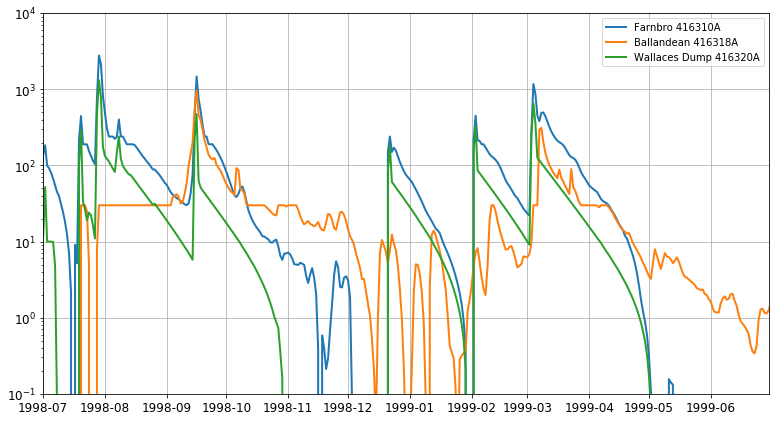

In [9]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.grid()
ax.set_ylim([0.1, 10000])
ax.set_xlim([pd.Timestamp('1998-07-01'), pd.Timestamp('1999-06-30')])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot(df['Farnbro 416310A (ML/d)'], linewidth='2', label='Farnbro 416310A')
ax.plot(df['Ballandean 416318A (ML/d)'], linewidth='2', label='Ballandean 416318A')
ax.plot(df['Wallaces Dump 416320A (ML/d)'], linewidth='2', label='Wallaces Dump 416320A')
ax.legend()